In [176]:
# -*- coding: utf-8 -*
import twitter
import csv
import json
import re
import requests
import lxml.html as html
from urllib2 import urlopen
import pandas as pd
from datetime import datetime, timedelta
from dateutil import tz
import time
import sklearn.cross_validation as cv
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [177]:
PREPARED_CSV = "prepared_to_analys.csv"
df = pd.read_csv(PREPARED_CSV, sep=",")

In [178]:
# Удаляем лишние столбцы
major_features = ["url", "week_day_news", "minutes_since_midnight", "first_time_tweet","follower_sum", "retweeted_count_sum", "favorite_count_sum", "user_listed_count_sum", "last_time_tweet"]
df = df[major_features]

In [179]:
# С глубоким прискорбием удаляем NA - если ничего не было, пока не будем будмать, что могло быть
df = df.drop_duplicates().dropna()

In [180]:
# В итоге имеем:
len(df)

152

In [181]:
df.head(1)

,url,week_day_news,minutes_since_midnight,first_time_tweet,follower_sum,retweeted_count_sum,favorite_count_sum,user_listed_count_sum,last_time_tweet
19,https://tjournal.ru/p/stupid-quotes,4,1340,1,250964,142,117,1166,28


In [182]:
x = df[df.columns[1:-1]].as_matrix()
y = df[df.columns[-1]].as_matrix()

In [183]:
# Делим данные
x_train, x_test, y_train, y_test = cv.train_test_split(x, y, test_size=0.2)

In [184]:
print "Коэффициенты корреляции Y:"
for i in range(len(major_features)-2):
    print major_features[i+1], "=", np.corrcoef(x[:,i], y)[0][1]

Коэффициенты корреляции Y:
week_day_news = -0.0240536597218
minutes_since_midnight = 0.0678051059417
first_time_tweet = 0.548349775285
follower_sum = 0.388895092952
retweeted_count_sum = 0.385000261317
favorite_count_sum = 0.38455136494
user_listed_count_sum = 0.216248894312


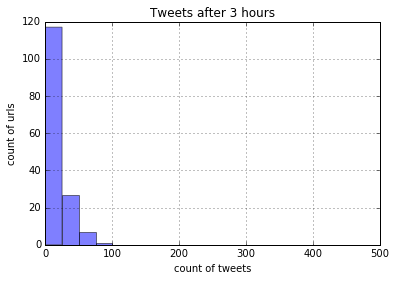

In [185]:
df.last_time_tweet.hist(alpha=0.5, bins=[i*25 for i in range(20)])
plt.title("Tweets after 3 hours")
plt.ylabel("count of urls")
plt.xlabel("count of tweets")
plt.show()

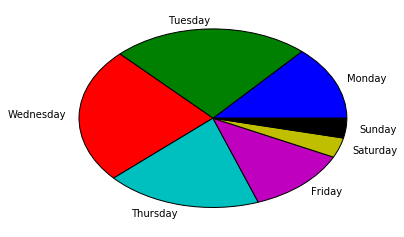

In [186]:
#df.week_day_news.hist(alpha=0.5, bins=[i for i in range(7)])
S = df.groupby("week_day_news")["last_time_tweet"].sum()
plt.pie(S.as_matrix(), labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]);
plt.show();

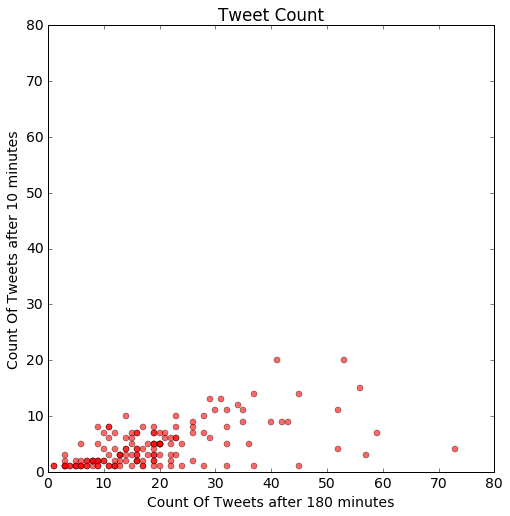

In [187]:
plt.figure(figsize=(8,8))
plt.plot(df["last_time_tweet"].as_matrix(), df["first_time_tweet"].as_matrix(), 'ro',  alpha=0.6)
plt.title("Tweet Count")
plt.xlabel("Count Of Tweets after 180 minutes")
plt.ylabel("Count Of Tweets after 10 minutes")
plt.xlim(0, 80)
plt.ylim(0, 80)
#plt.xscale('log')
#plt.yscale('log')
#plt.grid(b=True, which='both', color='0.65',linestyle='-')
plt.rcParams.update({'font.size': 14})

In [188]:
df[df["last_time_tweet"]< 40]

,url,week_day_news,minutes_since_midnight,first_time_tweet,follower_sum,retweeted_count_sum,favorite_count_sum,user_listed_count_sum,last_time_tweet
19,https://tjournal.ru/p/stupid-quotes,4,1340,1,250964,142,117,1166,28
160,https://vc.ru/n/fb-virus-2015,4,1005,2,61622,4,9,720,9
236,https://vc.ru/n/tpp-startups-money,4,784,2,77220,6,3,803,7
291,https://vc.ru/n/store-bee,4,576,1,74,0,0,3,5
303,https://vc.ru/n/uber-funding-round,3,1403,1,60745,6,3,678,3
342,https://vc.ru/p/apple-pencil-pro,3,1227,1,250953,10,42,1166,15
469,https://vc.ru/n/zygar-leave,3,1076,6,314451,11,18,1918,11
485,https://vc.ru/p/yandex-keyboard-or-not,3,1037,2,61001,4,9,772,7
533,https://vc.ru/p/tochka-redesign,3,887,5,62983,1,11,787,6
571,https://vc.ru/n/pure-sex,3,721,2,61428,2,19,682,16


In [189]:
df[df["last_time_tweet"]> 25][["first_time_tweet", "last_time_tweet"]]

,first_time_tweet,last_time_tweet
19,1,28
647,14,45
721,8,26
818,11,35
879,10,28
989,3,57
1270,11,52
1366,11,32
1653,1,45
1790,15,56


In [190]:
def plot(y_test, y_predicted,title="", text=""):
    plt.figure(figsize=(9,9))
    plt.plot(y_test, y_predicted, 'ro', label="predicted", alpha=0.7)
    plt.title(title)
    plt.xlabel("Y_TEST")
    plt.ylabel("Y_PREDICTED")
    
    max_y = max(max(y_true), max(y_predicted))+10
    
    plt.xlim(0, max_y)
    plt.ylim(0, max_y)
    #plt.legend()
    plt.text(0.05*max_y, max_y-0.05*max_y, "mse="+text, fontsize=15)
    
    plt.plot([0, max_y], [0, max_y], color='black', alpha=0.5)
    plt.grid(b=True, which='both', color='0.65',linestyle='-')
    
    plt.show()

In [191]:
def split_data(train_index, test_index):
    x_train = x[train_index]
    y_train = y[train_index]
    
    x_test = x[test_index]
    y_test = y[test_index]
    
    return x_train, x_test, y_train, y_test

In [192]:
loo = cv.LeaveOneOut(len(y))

## Деревья

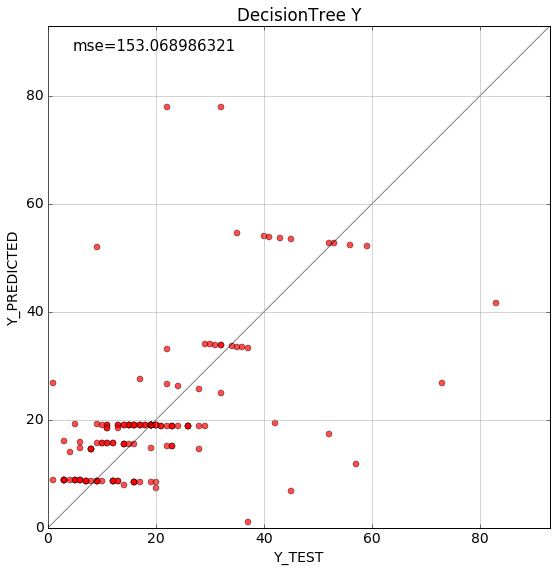

In [193]:
from sklearn.tree import DecisionTreeRegressor

y_predicted = []
y_true = []

for train_index, test_index in loo:
    x_train, x_test, y_train, y_test = split_data(train_index, test_index)
    dtree = DecisionTreeRegressor(max_depth=3)
    dtree.fit(x_train, y_train)
    y_pred = dtree.predict(x_test[0])
    y_predicted.append(y_pred[0])
    y_true.append(y_test[0])
    

mse = mean_squared_error(y_true, y_predicted)
plot(y_true, y_predicted, title="DecisionTree Y", text=str(mse))

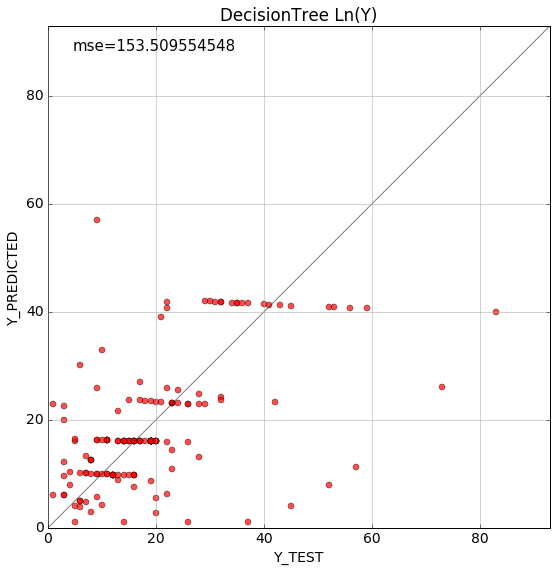

In [194]:
from sklearn.tree import DecisionTreeRegressor

y_predicted = []
y_true = []


for train_index, test_index in loo:
    x_train, x_test, y_train, y_test = split_data(train_index, test_index)
    dtree = DecisionTreeRegressor(max_depth=4)
    dtree.fit(x_train, np.log(y_train))
    y_pred = dtree.predict(x_test[0])
    y_predicted.append(np.exp(y_pred[0]))
    y_true.append(y_test[0])

mse = mean_squared_error(y_true, y_predicted)
plot(y_true, y_predicted, title="DecisionTree Ln(Y)", text=str(mse))

В целом, конечно, дерево решений работает плохо, но выбросы оно вполне себе улавливает

In [195]:
y_true = np.asarray(y_true)
y_predicted = np.asarray(y_predicted)
BIG = 100
y_big_true = y_true[y_true>BIG]
y_big_predicted = y_predicted[y_true>BIG]

In [196]:
a = pd.DataFrame([y_big_true, y_big_predicted])
a.index=["y_true","y_predicted"]
a

""
y_true
y_predicted


Вопрос к Михаилу.

Как замерять RandomForest и другие рандомные методы. Раз через раз дает катастрофическую разницу. 400!

In [197]:
df.reset_index(inplace=True)

In [198]:
predic = pd.Series(np.around(y_predicted))

In [199]:
df["DT_Predict"]=predic
df_LTT = df[["url", "last_time_tweet", "DT_Predict"]]
df_LTT[df_LTT["last_time_tweet"]>70]

,url,last_time_tweet,DT_Predict
93,https://tjournal.ru/p/condomchallenge,83,40
102,https://tjournal.ru/p/automate-everything,73,26


### LinearRegression

In [200]:
from sklearn.linear_model import Ridge

Подбираем параметр

In [201]:
alpha = [0.01, 0.1, 1, 10, 1e2, 1e3, 1e4, 1e5, 2e5, 4e5, 8e5, 1e6, 2e6, 4e6, 7e6, 1e7, 1e8]

mse = []
for al in alpha:
    y_predicted = []
    y_true = []

    for train_index, test_index in loo:
        x_train, x_test, y_train, y_test = split_data(train_index, test_index)
        model = Ridge(alpha=al)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test[0])
        y_predicted.append(y_pred[0])
        y_true.append(y_test[0])
    
    cur_mse = mean_squared_error(y_true, y_predicted)
    print cur_mse
    mse.append(cur_mse)

best_alpha = alpha[mse.index(min(mse))]
print "Best Aplha = ", best_alpha
#plot(y_true, y_predicted, title="DecisionTree Log(Y)")

133.658875673
133.658647868
133.656421229
133.639158335
133.858103434
143.939307019
165.881438905
161.544044325
160.417538882
161.489523452
164.006174073
164.874325804
167.172267441
168.577616692
169.119532749
169.265225341
168.706347372
Best Aplha =  10


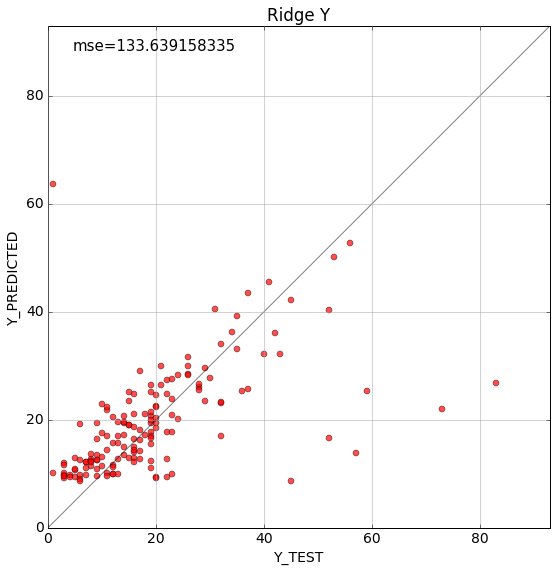

[  2.45966019e-01  -4.82500605e-04   2.24742813e+00   6.39539525e-06
   5.61121526e-02   7.64308568e-02  -1.95359252e-03]


In [202]:
y_predicted = []
y_true = []

for train_index, test_index in loo:
    x_train, x_test, y_train, y_test = split_data(train_index, test_index)
    model = Ridge(alpha=best_alpha)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test[0])
    y_predicted.append(y_pred[0])
    y_true.append(y_test[0])

mse = mean_squared_error(y_true, y_predicted)
plot(y_true, y_predicted, title="Ridge Y", text=str(mse))
print model.coef_

Теперь логарифм

In [203]:
alpha = [0.01, 0.1, 1, 10, 1e2, 1e3, 1e4, 1e5, 2e5, 4e5, 8e5, 1e6, 2e6, 4e6, 7e6, 1e7, 1e8]

mse = []
for al in alpha:
    y_predicted = []
    y_true = []

    for train_index, test_index in loo:
        x_train, x_test, y_train, y_test = split_data(train_index, test_index)
        model = Ridge(alpha=al)
        model.fit(x_train, np.log(y_train))
        y_pred = model.predict(x_test[0])
        y_predicted.append(np.exp(y_pred[0]))
        y_true.append(y_test[0])

    cur_mse = mean_squared_error(y_true, y_predicted)
    print cur_mse
    mse.append(cur_mse)


best_alpha = alpha[mse.index(min(mse))]
print "Best Aplha = ", best_alpha
#plot(y_true, y_predicted, title="DecisionTree Log(Y)")

206.921204768
206.92192966
206.929339879
207.019174624
209.159327193
250.425230332
292.125409734
195.037080152
181.433952241
176.611725363
175.815343925
175.867712441
176.170543561
176.259987389
176.127648408
175.990149923
175.295274642
Best Aplha =  100000000.0


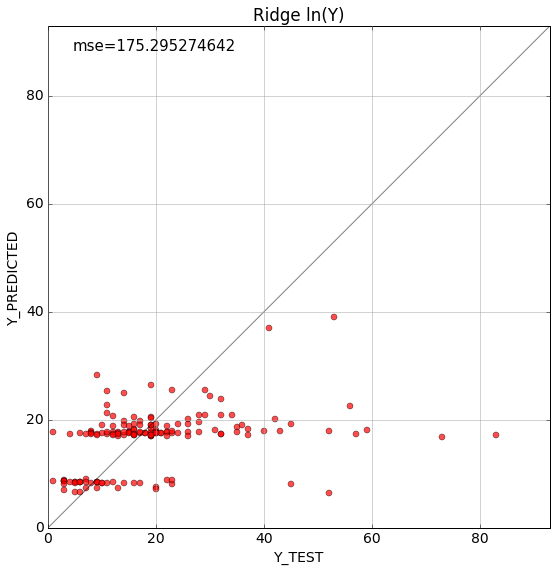

[ -3.99737057e-09   3.06377518e-05   1.14081627e-06   3.89505441e-06
   3.36338965e-06   5.92411608e-06  -1.35578105e-05]


In [204]:
y_predicted = []
y_true = []

for train_index, test_index in loo:
    x_train, x_test, y_train, y_test = split_data(train_index, test_index)
    model = Ridge(alpha=best_alpha)
    model.fit(x_train, np.log(y_train))
    y_pred = model.predict(x_test[0])
    y_predicted.append(np.exp(y_pred[0]))
    y_true.append(y_test[0])
    
mse = mean_squared_error(y_true, y_predicted)
plot(y_true, y_predicted, title="Ridge ln(Y)", text=str(mse))
print model.coef_

# RandomForest 

In [205]:
from sklearn.ensemble import RandomForestRegressor

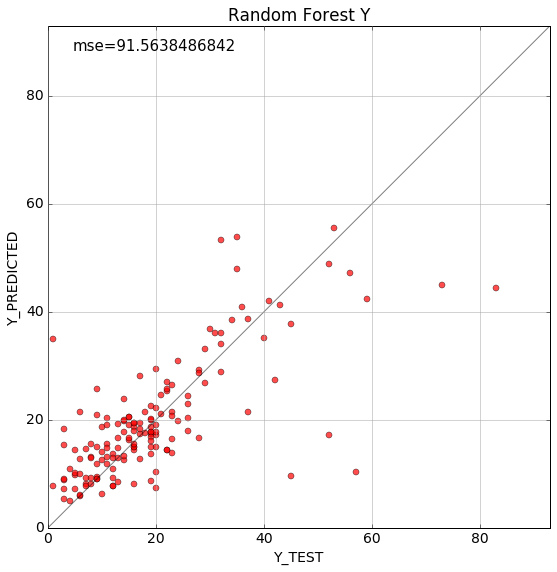

In [206]:
y_predicted = []
y_true = []

for train_index, test_index in loo:
    x_train, x_test, y_train, y_test = split_data(train_index, test_index)
    model = RandomForestRegressor(n_estimators=20)
    model.fit(x_train, (y_train))
    y_pred = model.predict(x_test[0])
    y_predicted.append((y_pred[0]))
    y_true.append(y_test[0])

mse = mean_squared_error(y_true, y_predicted)
plot(y_true, y_predicted, title="Random Forest Y", text=str(mse))

#### Теперь логарифм

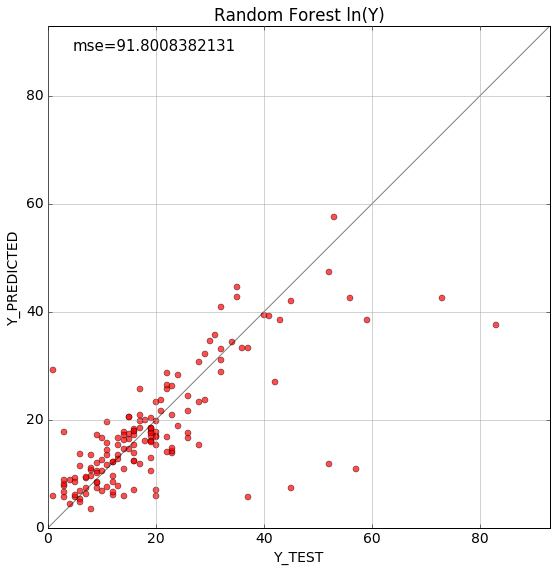

In [207]:
y_predicted = []
y_true = []

for train_index, test_index in loo:
    x_train, x_test, y_train, y_test = split_data(train_index, test_index)
    model = RandomForestRegressor(n_estimators=50)
    model.fit(x_train, np.log(y_train))
    y_pred = model.predict(x_test[0])
    y_predicted.append(np.exp(y_pred[0]))
    y_true.append(y_test[0])

mse = mean_squared_error(y_true, y_predicted)
plot(y_true, y_predicted, title="Random Forest ln(Y)", text=str(mse))

In [141]:
predic = pd.Series(np.around(y_predicted))
df["predicted"]=predic
d = df.sort_values("last_time_tweet", ascending=False)
d[["url", "last_time_tweet", "predicted"]].head(20)

,url,last_time_tweet,predicted
125,https://vc.ru/n/rao-stop-money,76,50
85,https://vc.ru/n/fb-uk-court,63,60
71,https://vc.ru/n/cards-money,62,59
67,https://vc.ru/p/solar-power,52,53
173,https://tjournal.ru/p/usembru-vs-izvestia,48,43
159,https://tjournal.ru/p/watch-paint-dry,47,47
172,https://tjournal.ru/p/grugq-telegram,43,46
185,https://tjournal.ru/p/aliexpress-garbage,40,37
150,https://tjournal.ru/p/icloud-thief,37,34
165,https://tjournal.ru/p/parking-fire,35,34


## Проверка

In [34]:
df = pd.read_csv(PREPARED_CSV, sep=",")
df = df[["url", "week_day_news", "minutes_since_midnight", "first_time_tweet","follower_sum", "retweeted_count_sum", "favorite_count_sum", "user_listed_count_sum", "last_time_tweet", "views", "comments"]]
df = df.drop_duplicates().dropna()
df = df.reset_index()

In [35]:
ltt = df["last_time_tweet"].as_matrix()
comments = df["comments"].as_matrix()
views = df["views"].as_matrix()

In [36]:
np.corrcoef(views, ltt)

array([[ 1.        ,  0.39176351],
       [ 0.39176351,  1.        ]])

In [37]:
np.corrcoef(comments, ltt)

array([[ 1.       ,  0.3524211],
       [ 0.3524211,  1.       ]])

In [38]:
np.corrcoef(views, comments)

array([[ 1.        ,  0.65061814],
       [ 0.65061814,  1.        ]])

In [39]:
m = np.mean(comments)

In [40]:
np.corrcoef(views*np.exp(comments*0.5/m), ltt)

array([[ 1.        ,  0.28837992],
       [ 0.28837992,  1.        ]])

In [333]:
df = pd.read_csv(PREPARED_CSV, sep=",")
df = df[["url", "week_day_news", "minutes_since_midnight", "first_time_tweet","follower_sum", "retweeted_count_sum", "favorite_count_sum", "user_listed_count_sum", "last_time_tweet", "views", "comments"]]
df = df.drop_duplicates().dropna()
df = df.reset_index()
ltt = df["last_time_tweet"].as_matrix()
comments = df["comments"].as_matrix()
views = df["views"].as_matrix()

In [367]:
def plot(y_test, y_predicted, labelX, labelY):
    plt.figure(figsize=(9,9))
    plt.plot(y_test, y_predicted, 'ro', label="predicted", alpha=0.7)
    #plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)

    #max_y = max(max(y_true), max(y_predicted))+10

    #plt.xlim(0, max_y)
    #plt.ylim(0, max_y)
    plt.xscale('log')
    plt.yscale('log')
    #plt.legend()
    #plt.text(0.05*max_y, max_y-0.05*max_y, "mse="+text, fontsize=15)

    #plt.plot([0, max_y], [0, max_y], color='black', alpha=0.5)
    #plt.grid(b=True, which='both', color='0.65',linestyle='-')

    plt.show()

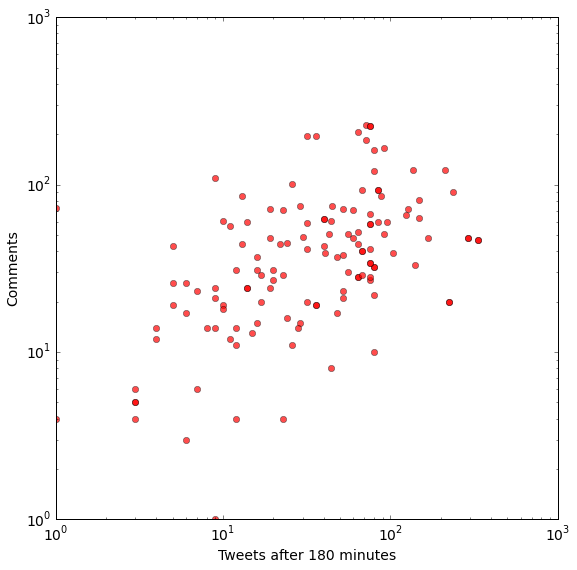

In [368]:
plot(ltt, comments, "Tweets after 180 minutes", "Comments")

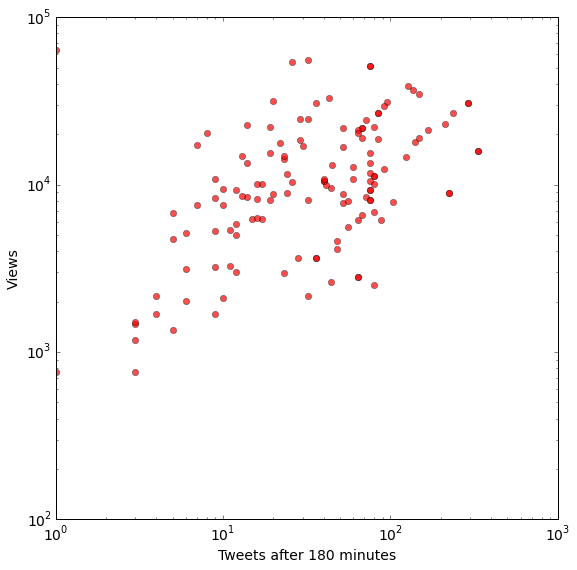

In [362]:
#plot(ltt, views, "Tweets after 180 minutes", "Views")
plt.figure(figsize=(9,9))
plt.plot(ltt, views, 'ro', label="predicted", alpha=0.7)
#plt.title(title)
plt.xlabel("Tweets after 180 minutes")
plt.ylabel("Views")
plt.xscale('log')
plt.yscale('log')
#max_y = max(max(y_true), max(y_predicted))+10
#plt.xlim(0, max_y)
#plt.ylim(0, max_y)
#plt.legend()
#plt.text(0.05*max_y, max_y-0.05*max_y, "mse="+text, fontsize=15)

#plt.plot([0, max_y], [0, max_y], color='black', alpha=0.5)
#plt.grid(b=True, which='both', color='0.65',linestyle='-')

plt.show()

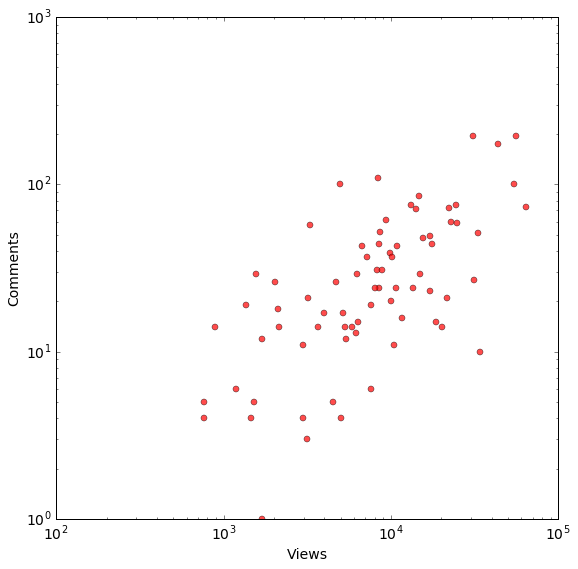

In [41]:
#plot(views, comments, "Views", "Comments")
#plot(ltt, views, "Tweets after 180 minutes", "Views")
plt.figure(figsize=(9,9))
plt.plot(views, comments, 'ro', label="predicted", alpha=0.7)
#plt.title(title)
plt.xlabel("Views")
plt.ylabel("Comments")
plt.xscale('log')
plt.yscale('log')
#max_y = max(max(y_true), max(y_predicted))+10
#plt.xlim(0, max_y)
#plt.ylim(0, max_y)
#plt.legend()
#plt.text(0.05*max_y, max_y-0.05*max_y, "mse="+text, fontsize=15)

#plt.plot([0, max_y], [0, max_y], color='black', alpha=0.5)
#plt.grid(b=True, which='both', color='0.65',linestyle='-')

plt.show()